In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
import seaborn as sns

In [4]:
dataset= pd.read_csv(r'C:\Users\neelesh tiwari\Desktop\sir ducat\dataset\SalaryData.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
dataset.shape

(30, 2)

In [6]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

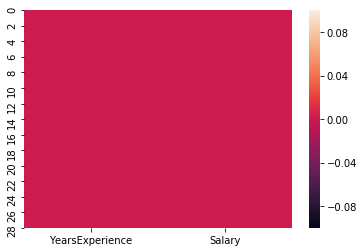

In [14]:
sns.heatmap(dataset.isnull()) #visualize the null values in dataset if there is any change in distributed colour above the column name then there is a null value and hence we have to preprocess the dataset

In [9]:
dataset.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [10]:
x= dataset.iloc[:, :-1].values
y= dataset.iloc[:, -1].values

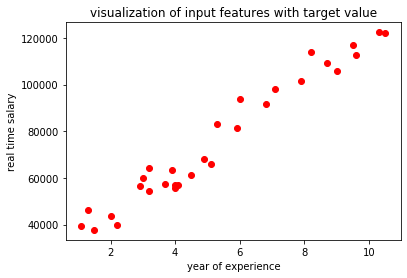

In [15]:
plt.scatter(x,y,color='red')
plt.title('visualization of input features with target value')
plt.xlabel('year of experience')
plt.ylabel('real time salary')
plt.show()

Since x & y are varying linearly hence we can apply linear regression to our model.

In [17]:
## Splitting the dataset into train and train
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= .20, random_state= 0)

- Default split size is 75% vs 25% if test_size argument is not given.
- If random_state argument is not provided then data splitting and shuffling takes place according to system clock millisecond.

In [18]:
## Fitting Simple linear Regression
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()  # Model Initialization- untrained model
regressor.fit(x_train, y_train) # trained model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
coef = regressor.coef_  # return no. of slope as much no. of features
# m = regressor.coef_[0] # to pick individual slope if having no. of slopes
coef

array([9312.57512673])

In [20]:
b = regressor.intercept_  # return intercept
b

26780.099150628186

#### Various methods to get slope and intercept:
- variance, covariance method
- statistical method
- calculus method

#### Statistical Method:
Specific to only one feature:

<img src= './Image/5.1 Image d.PNG' width=20% height=20%/>


<img src= './Image/5.1 Image e.PNG' width=15% height=15%>

In [21]:
#finding the coef and the slope(m) by the given formula.
x_mean = np.mean(x_train.flatten())
y_mean = np.mean(y_train)
x_y  = x_train.flatten() * y_train
x_y_mean = np.mean(x_y)
x_mean_sqr = x_mean ** 2
x_sqr = x_train.flatten() ** 2
x_sqr_mean = np.mean(x_sqr)

m_manual = ((x_mean * y_mean) - x_y_mean)/(x_mean_sqr- x_sqr_mean)
print(m_manual)

b_manual = y_mean - (m_manual * x_mean)
print(b_manual)

9312.575126729193
26780.099150628157


In [22]:
## Predicting the test set result manually
m = regressor.coef_.reshape(1,-1).T
np.dot(x_test,m) + b

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [23]:
## Predicting the test set result using predict() method
y_pred_train= regressor.predict(x_train) # calcilated just for the evaluation of model .or one can say to check the lerning rate
y_pred_test= regressor.predict(x_test)

In [24]:
y_pred_test # the same output as the manual result.

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [25]:
## Making prediction for unseen data eg. for 2.6 year of experience
# hrre regressor is our traind model .
regressor.predict([[2.6]])

array([50992.79448012])

In [26]:
## Evaluating the predicted result w.r.t original result using r2 score 
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.9411949620562126
0.988169515729126


In [27]:
print(regressor.score(x_test, y_test))
regressor.score(x_train, y_train)

0.988169515729126


0.9411949620562126

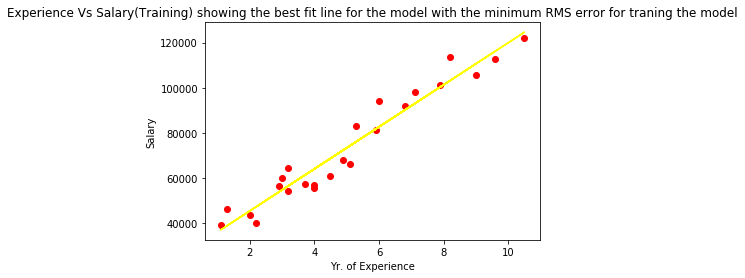

In [29]:
# Visualizing the Training set
plt.scatter(x_train,y_train,color='red') #training data
plt.plot(x_train, y_pred_train,color='yellow')
plt.title('Experience Vs Salary(Training) showing the best fit line for the model with the minimum RMS error for traning the model')
plt.xlabel('Yr. of Experience')
plt.ylabel('Salary')
plt.show()

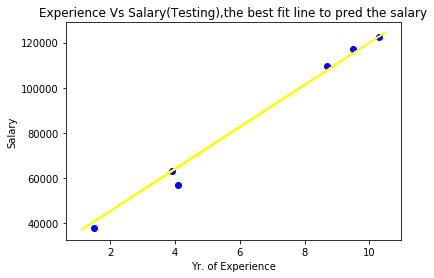

In [30]:
plt.scatter(x_test,y_test,color='blue') #testing data
plt.plot(x_train, y_pred_train,color='yellow')
plt.title('Experience Vs Salary(Testing),the best fit line to pred the salary')
plt.xlabel('Yr. of Experience')
plt.ylabel('Salary')
plt.show()